In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from utils import *
import warnings
warnings.filterwarnings("ignore")
# plt.rcParams["font.family"] = u'AppleGothic'
# plt.rcParams['axes.unicode_minus'] = False

In [2]:
# load
left_df = pd.read_csv('./data/daily_left.csv').set_index('year').drop('l_1.6-2.0',axis=1)

# to_datetime
left_df.index = pd.to_datetime(left_df.index)

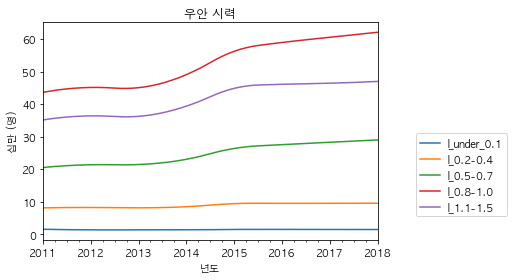

In [3]:
(left_df/100000).plot()
plt.title('우안 시력')
plt.legend(loc='right', bbox_to_anchor=(1.4, 0.3))
plt.ylabel("십만 (명)")
plt.xlabel("년도")
plt.show()

In [4]:
# Scaling gradient vanishing 
df = left_df/100000
df.head()

,l_under_0.1,l_0.2-0.4,l_0.5-0.7,l_0.8-1.0,l_1.1-1.5
year,,,,,
2011-01-01,2,8,21,44,35
2011-01-02,2,8,21,44,35
2011-01-03,2,8,21,44,35
2011-01-04,2,8,21,44,35
2011-01-05,2,8,21,44,35


In [14]:
# set values
num_data = df.shape[0]
shift_steps = 365
num_train =  num_data - shift_steps

# split data 
train =  df.iloc[:-(366+366),:].T
test = df.iloc[-(366+366):-366,:].T
answer =  df.iloc[-366:,:].T

In [22]:
train

년도,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,2011-01-10,...,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31
우안시력_0.1 이하,1.54576,1.545074,1.544388,1.543704,1.543021,1.542339,1.541658,1.540978,1.540299,1.539622,...,1.526721,1.526691,1.526660,1.526630,1.526600,1.526570,1.526539,1.526509,1.526480,1.526450
우안시력_0.2-0.4,8.12001,8.120767,8.121523,8.122275,8.123026,8.123775,8.124521,8.125265,8.126007,8.126747,...,9.611626,9.611594,9.611563,9.611533,9.611506,9.611479,9.611454,9.611431,9.611409,9.611389
우안시력_0.5-0.7,20.39710,20.400778,20.404448,20.408110,20.411765,20.415412,20.419052,20.422685,20.426309,20.429927,...,27.436999,27.438915,27.440831,27.442747,27.444662,27.446578,27.448493,27.450407,27.452322,27.454236
우안시력_0.8-1.0,43.64846,43.656490,43.664501,43.672494,43.680467,43.688421,43.696356,43.704272,43.712169,43.720047,...,59.328269,59.333334,59.338394,59.343449,59.348500,59.353546,59.358588,59.363626,59.368658,59.373686
우안시력_1.1-1.5,34.93083,34.936776,34.942708,34.948624,34.954524,34.960410,34.966281,34.972136,34.977976,34.983801,...,45.749373,45.750258,45.751143,45.752026,45.752908,45.753790,45.754670,45.755549,45.756427,45.757304


In [17]:
# model import 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor

In [20]:
# convert train to time_seires 
df_train = generate_time_series(train)


# model.fit(df_train.iloc[:,0:-1].values, df_train.iloc[:,-1].values)
# for n, c in enumerate(list(answer.columns)):
#     test[c] = model.predict(test.iloc[:,n:].values)

In [21]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,365,366
0,1.545760,1.545074,1.544388,1.543704,1.543021,1.542339,1.541658,1.540978,1.540299,1.539622,...,1.369337,1.369036,1.368736,1.368438,1.368140,1.367843,1.367548,1.367253,1.366960,1.366668
1,1.545074,1.544388,1.543704,1.543021,1.542339,1.541658,1.540978,1.540299,1.539622,1.538945,...,1.369036,1.368736,1.368438,1.368140,1.367843,1.367548,1.367253,1.366960,1.366668,1.366376
2,1.544388,1.543704,1.543021,1.542339,1.541658,1.540978,1.540299,1.539622,1.538945,1.538270,...,1.368736,1.368438,1.368140,1.367843,1.367548,1.367253,1.366960,1.366668,1.366376,1.366086
3,1.543704,1.543021,1.542339,1.541658,1.540978,1.540299,1.539622,1.538945,1.538270,1.537595,...,1.368438,1.368140,1.367843,1.367548,1.367253,1.366960,1.366668,1.366376,1.366086,1.365797
4,1.543021,1.542339,1.541658,1.540978,1.540299,1.539622,1.538945,1.538270,1.537595,1.536922,...,1.368140,1.367843,1.367548,1.367253,1.366960,1.366668,1.366376,1.366086,1.365797,1.365509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,44.535202,44.545199,44.555148,44.565050,44.574904,44.584711,44.594470,44.604182,44.613846,44.623463,...,45.745820,45.746709,45.747598,45.748486,45.749373,45.750258,45.751143,45.752026,45.752908,45.753790
7296,44.545199,44.555148,44.565050,44.574904,44.584711,44.594470,44.604182,44.613846,44.623463,44.633032,...,45.746709,45.747598,45.748486,45.749373,45.750258,45.751143,45.752026,45.752908,45.753790,45.754670
7297,44.555148,44.565050,44.574904,44.584711,44.594470,44.604182,44.613846,44.623463,44.633032,44.642554,...,45.747598,45.748486,45.749373,45.750258,45.751143,45.752026,45.752908,45.753790,45.754670,45.755549
7298,44.565050,44.574904,44.584711,44.594470,44.604182,44.613846,44.623463,44.633032,44.642554,44.652029,...,45.748486,45.749373,45.750258,45.751143,45.752026,45.752908,45.753790,45.754670,45.755549,45.756427


# our Goal

<Figure size 1440x576 with 0 Axes>

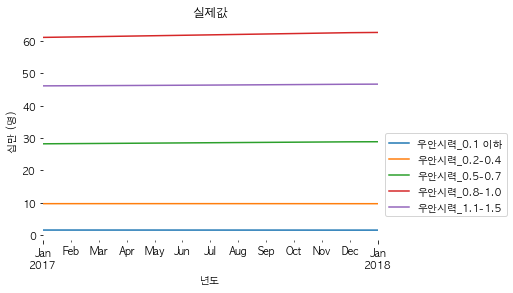

In [25]:
answer_resample = df.iloc[-366:,:].resample('M')
answer_resample_mean_sales = answer_resample.mean()
plt.figure(figsize=(20,8))

answer_resample_mean_sales.plot()
plt.title('실제값')
plt.ylabel('십만 (명)')
plt.box(False)
plt.rcParams["font.weight"] = "bold"
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.3))
plt.show()


In [23]:
models = [
    ElasticNet(random_state=42, alpha=0.9),
    Lasso(random_state=42),
    Ridge(random_state=42),
    LinearRegression(),
    HuberRegressor(),
    LassoLars(alpha=0.1,fit_intercept=False,max_iter=10,),
    Lars(),
    PassiveAggressiveRegressor(max_iter=10, tol=1e-3),
    RANSACRegressor(random_state=42),
]

<Figure size 1440x576 with 0 Axes>

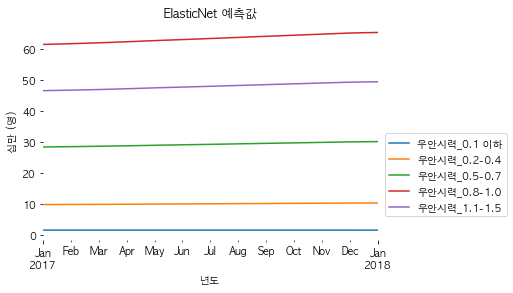

<Figure size 1440x576 with 0 Axes>

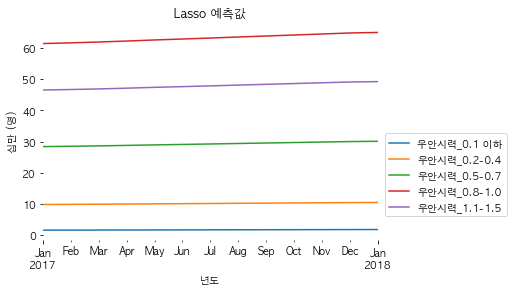

<Figure size 1440x576 with 0 Axes>

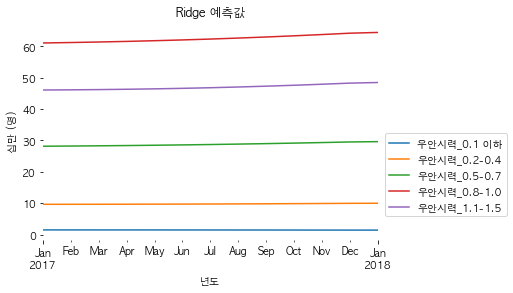

<Figure size 1440x576 with 0 Axes>

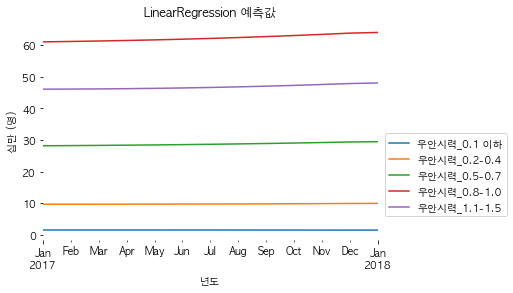

<Figure size 1440x576 with 0 Axes>

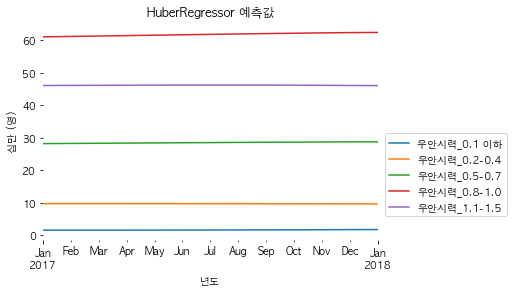

<Figure size 1440x576 with 0 Axes>

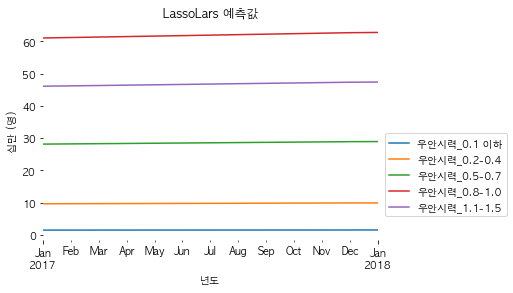

<Figure size 1440x576 with 0 Axes>

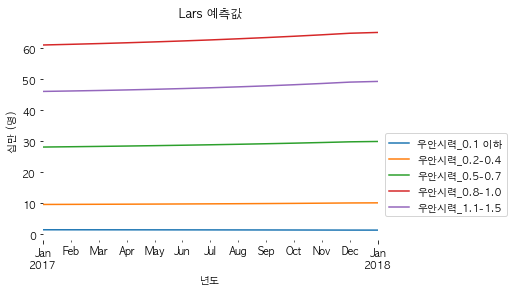

<Figure size 1440x576 with 0 Axes>

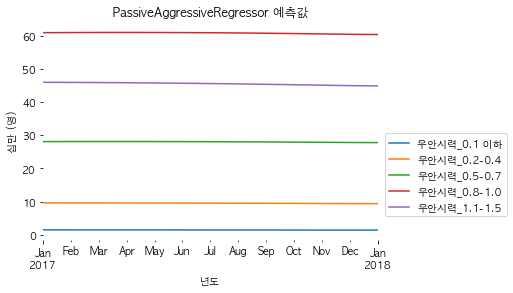

<Figure size 1440x576 with 0 Axes>

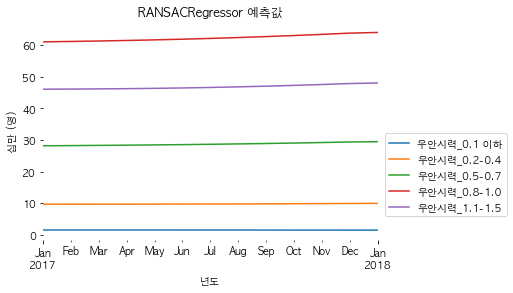

In [24]:
# Predicting

rmse_result = dict()

for model in models:
    model.fit(df_train.iloc[:, 0:-1].values, df_train.iloc[:, -1].values)
    test = test.loc[:,'2016-01-01':'2016-12-31']
    for n, c in enumerate(list(answer.columns)):
        test[c] = model.predict(test.iloc[:, n:].values)

    predicted = test.loc[:, '2017-01-01':'2018-01-01'].T
    rmse_score = round(np.sqrt(mean_squared_error(predicted, answer.T)), 2)

    resample = predicted.resample('M')
    quarterly_mean_sales = resample.mean()
    
    model_name = type(model).__name__
    
    rmse_result[model_name] = rmse_score
    
    plt.figure(figsize=(20, 8))
    quarterly_mean_sales.plot()
    plt.box(False)
    plt.ylabel('십만 (명)')
    plt.title(f'{model_name} 예측값')
    plt.rcParams["font.weight"] = "bold"
    plt.legend(loc='right',
               bbox_to_anchor=(1.4, 0.3))
    plt.show()

In [14]:
# result RMSE table
tmp = pd.Series(rmse_result).to_frame()
tmp.columns=['RMSE score']
tmp

,RMSE score
ElasticNet,1.19
Lasso,1.08
Ridge,0.54
LinearRegression,0.40
HuberRegressor,0.26
LassoLars,0.24
Lars,0.85
PassiveAggressiveRegressor,1.30
RANSACRegressor,0.40
